In [11]:
using Pkg
Pkg.add("DataFrames")
Pkg.add("Optim")
Pkg.add("Plots")

   Resolving package versions...
  No Changes to `C:\Users\sigma\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\sigma\.julia\environments\v1.8\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\sigma\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\sigma\.julia\environments\v1.8\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\sigma\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\sigma\.julia\environments\v1.8\Manifest.toml`


In [17]:
using DataFrames

bond_data = DataFrame(
    Maturity = [1, 2, 3, 4, 5, 6, 7, 8, 9 , 10],
    Bond_Price = [89, 92, 93, 94, 95, 96, 97, 99, 101, 105]
)


,Maturity,Bond_Price
,Int64,Int64
1,1,89
2,2,92
3,3,93
4,4,94
5,5,95
6,6,96
7,7,97
8,8,99
9,9,101


In [18]:
using Optim

function bond_price(par_yield::Float64, maturity::Int64, face_value::Float64)
    coupon = par_yield * face_value
    cash_flows = [coupon for _ in 1:(maturity - 1)]
    cash_flows = vcat(cash_flows, [coupon + face_value])

    present_value = sum([cf / (1 + par_yield)^t for (t, cf) in enumerate(cash_flows)])
    return present_value
end

function objective_function(par_yield, bond_data, i)
    maturity = bond_data.Maturity[i]
    face_value = 100.0
    target_price = bond_data.Bond_Price[i]

    return (bond_price(par_yield, maturity, face_value) - target_price)^2
end


objective_function (generic function with 1 method)

In [19]:
bootstrap_yields = Float64[]

for i in 1:nrow(bond_data)
    res = optimize(par_yield -> objective_function(par_yield, bond_data, i), 0.0, 1.0)
    push!(bootstrap_yields, Optim.minimizer(res))
end

println("Bootstrapped Yields: ", bootstrap_yields)


Bootstrapped Yields: [0.2360679774997897, 0.23611124506771775, 0.2360679774997897, 0.673762078750736, 0.6180339887498948, 0.6180339887498948, 0.6180339887498948, 0.6180339887498948, 0.32623792124926393, 0.30521992632860473]


In [20]:
using Plots

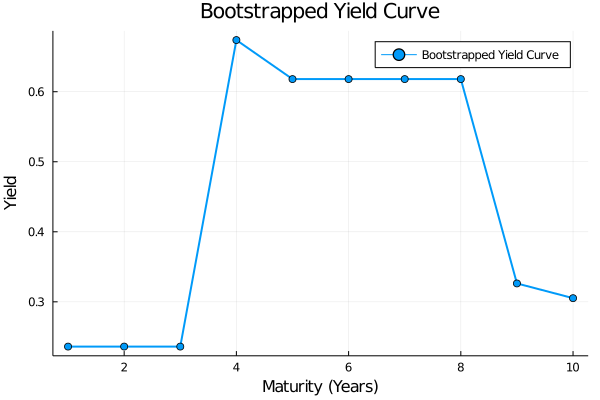

In [21]:
plot(bond_data.Maturity, bootstrap_yields, label="Bootstrapped Yield Curve", xlabel="Maturity (Years)", ylabel="Yield", title="Bootstrapped Yield Curve", marker=:circle, lw=2)
